In [32]:
import matplotlib.pyplot as plt
import glob
from PIL import Image, ImageDraw, ImageFont
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit

from skimage import feature, data, color
from glob import glob # Used to easily find file paths
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [62]:
img = cv2.imread('all-mias/mdb005.pgm', cv2.IMREAD_GRAYSCALE)
# print(img.shape, img.dtype)
# img.max()
# plt.imshow(img, cmap='gray')

n_img = ((img - img.min()) / (img.max() - img.min()) * 255) # Normalazing the image 
P = 8
R = 1
method = 'uniform'
LBP = feature.local_binary_pattern(n_img, P, R, method)
print(LBP.min())

#compute th histogram from 255 in image size to 59 =>  reduce the number of bins
bins_num = int(n_img.max()) + 1 
histogram, _ = np.histogram(n_img.ravel(), bins=bins_num, range=(0, bins_num))

# Pooling the image in to 6 x 6
H = 1020 # height
W = 1020 # width
G = 6 # Number of Grid 6 * 6 
hor = int(H / G) # height of each region
wor = int(W / G) # width of each region

# Pooling the data into 6 * 6 regions
for i in range(G):
    for j in range(G):
        row_start = i * hor
        row_end = (i + 1) * hor
        col_start = j * wor
        col_end = (i + 1) * wor
        region = img[row_start:row_end, col_start:col_end]
x_list = []
y_list = []
for img, label in zip(img, labels):
    histogram = compute_histograms_for_each_region(img)

    f_vector = np.concatenate(histogram)

    x_list.append(f_vector)
    y_list.append(label)

X = np.array(x_list)
y = np.array(y_list)

print(hor)

print(histogram)

0.0


NameError: name 'labels' is not defined

In [53]:
unique_codes = np.unique(LBP)
print("Unique LBP codes in this image:", unique_codes)

Unique LBP codes in this image: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


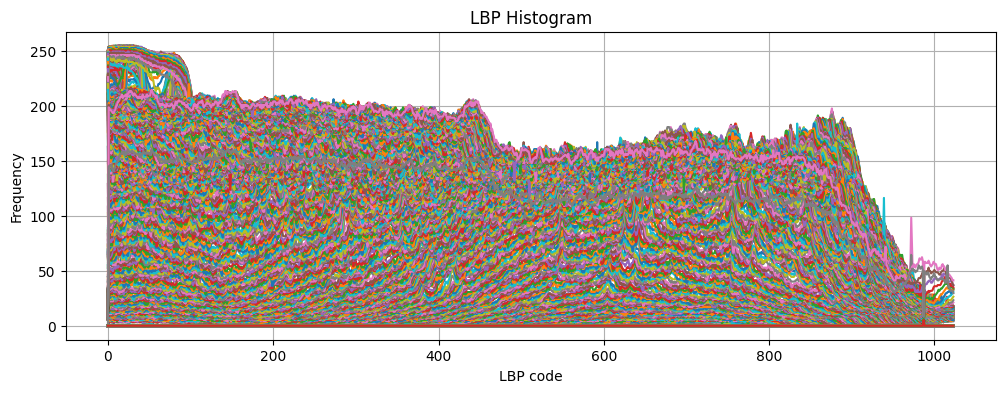

In [52]:
plt.figure(figsize=(12,4))
plt.plot(n_img)
plt.title("LBP Histogram")
plt.xlabel("LBP code")
plt.ylabel("Frequency")
plt.grid()
plt.show()

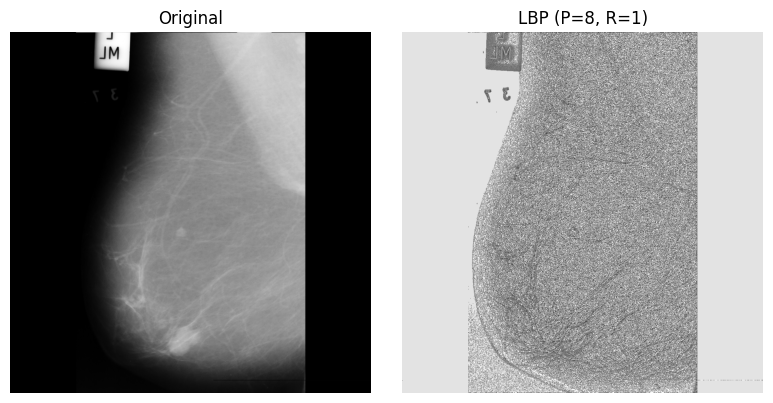

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(n_img, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(LBP, cmap='gray')
axes[1].set_title(f"LBP (P={P}, R={R})")
axes[1].axis('off')
plt.tight_layout()
plt.show()

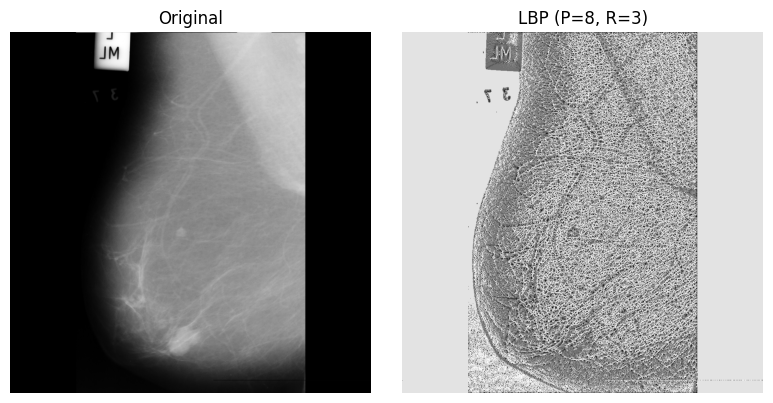

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(n_img, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(LBP, cmap='gray')
axes[1].set_title(f"LBP (P={P}, R={R})")
axes[1].axis('off')
plt.tight_layout()
plt.show()